In [2013]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import Lasso, LassoCV, Ridge

#### Key objectives:
- Handle missing values
- Determine what each categorical value represents and rename values and/or columns(reference read data dictionary)
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?) i.e. 

In [2014]:
train = pd.read_csv('../data/train.csv')

In [2015]:
train['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW'], dtype=object)

In [2016]:
test = pd.read_csv('../data/test.csv')

In [2017]:
test['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Floor'], dtype=object)

In [2018]:
test

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,PConc,TA,T

In [2019]:
# makes Jupyter show all rows and columns for better visibility
pd.options.display.max_rows = train.shape[1]
pd.options.display.max_columns = train.shape[1]
pd.set_option('display.max_columns', 300)

In [2020]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [2021]:
train.shape

(2051, 81)

In [2022]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [2023]:
# Baseline model is the mean house price
baseline = '{:,.2f}'.format(round(train['SalePrice'].mean()))
print(f'${baseline}')

$181,470.00


## Data Cleaning

#### I started by renaming the columns for readability via the data dictionary

In [2024]:
train.shape

(2051, 81)

In [2025]:
renamed_columns = {
    'Pool QC': 'pool_quality',
    'Fence': 'fence_quality',
    'Mas Vnr Type': 'masonry_veneer_type',
    'Fireplace Qu': 'fireplace_quality',
    'Lot Frontage': 'lot_frontage',
    'Garage Qual': 'garage_quality',
    'Garage Finish': 'garage_finish(renovated)',
    'Garage Yr Blt': 'garage_yr_built',
    'Garage Cond': 'garage_condition',
    'Garage Type': 'garage_type',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 2': '2nd_finish_bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Qual': 'bsmt_qual',
    'BsmtFin Type 1': 'finish_bsmt_qual',
    'Mas Vnr Area': 'masonry_veneer_area',
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Bsmt Full Bath': 'bsmt_full_bath',
    'Garage Area': 'garage_area',
    'Total Bsmt SF': 'bsmt_SF',
    'Bsmt Unf SF': 'bsmt_unf_SF',
    'BsmtFin SF 2': 'bsmt_2_finish_SF',
    'BsmtFin SF 1': 'bsmt_finish_SF',
    'Garage Cars': 'garage_cars',
    'Mo Sold': 'month_sold',
    'Yr Sold': 'year_sold',
    'Sale Type': 'sale_type',
    'Functional': 'home_functionality',
    '3Ssn Porch': '3_ssn_porch_area',
    'Gr Liv Area': 'gr_liv_area',
    'Heating QC': 'heating_qual',
    'MS SubClass': 'building_class',
    'MS Zoning': 'zoning_classification_of_sale',
    'Condition 1': 'prox_to_mainroad_or_railroad',
    'Condition 2': 'prox_to_mainroad_or_railroad_2nd',
    'Year Remod/Add': 'remodel_date',
    'Exterior 1st': 'exterior_type',
    'Exterior 2nd': 'exterior_type_2nd',
    'Foundation': 'foundation_type',
    'Central Air': 'central_air',
    'Electrical': 'electrical_type',
    'Alley': 'alley_access'
}

# Rename column headers
train.rename(columns=renamed_columns, inplace=True)


In [2026]:
# Created sale date column for possible timeseries analysis
# train['sale_date'] = train['year_sold'].astype(str) + '-' + train['month_sold'].astype(str)

In [2027]:
# train.drop(columns=['PID', 'Id'], inplace=True)

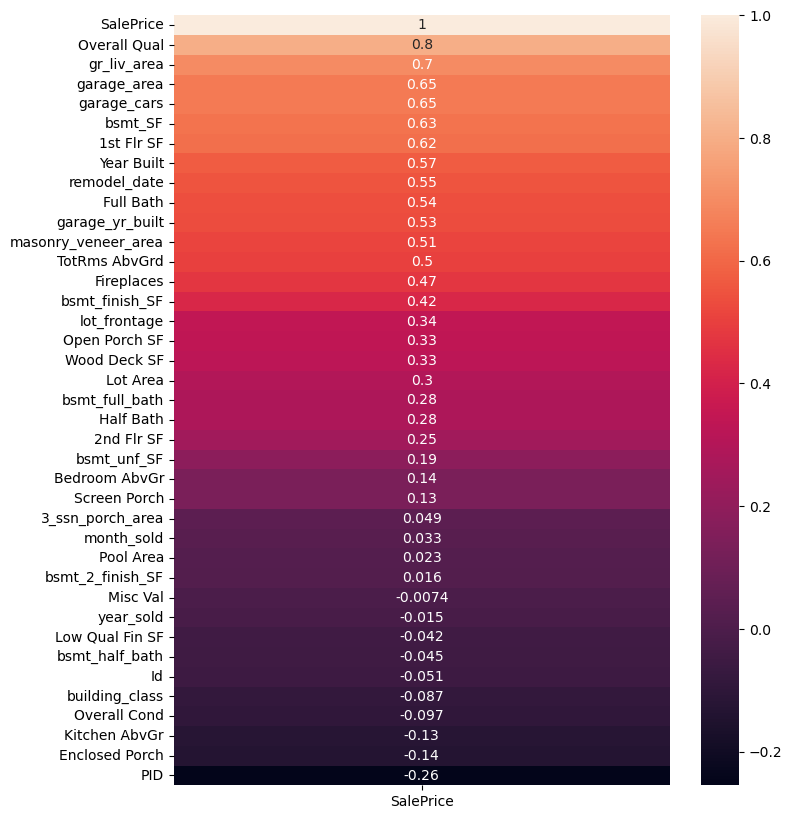

In [2028]:
# shows the highest corellating variables // Started with top 12 variables in my first model.
plt.figure(figsize=(8,10))
sns.heatmap(train.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending = False), annot=True);

### Missing values

In [2029]:
# All missing values from highest to lowest
train.isnull().sum().sort_values(ascending=False).head(28)

pool_quality                2042
Misc Feature                1986
alley_access                1911
fence_quality               1651
masonry_veneer_type         1240
fireplace_quality           1000
lot_frontage                 330
garage_quality               114
garage_finish(renovated)     114
garage_yr_built              114
garage_condition             114
garage_type                  113
bsmt_exposure                 58
2nd_finish_bsmt_qual          56
bsmt_cond                     55
bsmt_qual                     55
finish_bsmt_qual              55
masonry_veneer_area           22
bsmt_half_bath                 2
bsmt_full_bath                 2
garage_area                    1
bsmt_SF                        1
bsmt_unf_SF                    1
bsmt_2_finish_SF               1
bsmt_finish_SF                 1
garage_cars                    1
month_sold                     0
sale_type                      0
dtype: int64

In [2030]:
# Show all categorical columns and their values
cat_columns = train.select_dtypes(include='object').columns.tolist()
for col in cat_columns:
    print(f'{col}: ({train[col].nunique()}) -> {train[col].unique()}')

zoning_classification_of_sale: (7) -> ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Street: (2) -> ['Pave' 'Grvl']
alley_access: (2) -> [nan 'Pave' 'Grvl']
Lot Shape: (4) -> ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour: (4) -> ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities: (3) -> ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config: (5) -> ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope: (3) -> ['Gtl' 'Sev' 'Mod']
Neighborhood: (28) -> ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
prox_to_mainroad_or_railroad: (9) -> ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
prox_to_mainroad_or_railroad_2nd: (8) -> ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Bldg Type: (5) -> ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
House Style: (8) -> ['2Story' '1St

#### Below it's observed that each category where there's a null value represents that the feature does not exist for that property. We will then replace the nulls with "none" or 0 to represent that.

In [2031]:
# show all the categories for columns with more than 5 nulls
null_counts = train.isnull().sum()
null_columns = null_counts[null_counts > 5].index.tolist()

for column in train[null_columns]:
    print(f'{column}: {train[column].unique()}')

lot_frontage: [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
alley_access: [nan 'Pave' 'Grvl']
masonry_veneer_type: ['BrkFace' nan 'Stone' 'BrkCmn']
masonry_veneer_area: [2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02       nan 3.000e+00 3.360e+02 4.800e+02 3.200e+02
 1.040e+02 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02
 5.220e+02 1.430e+02 3.480e+02 1.170e+02 5.100e+02 1.450e+0

In [2032]:
# Drop rows in columns with 5 or less nulls
train.dropna(subset=['bsmt_full_bath', 
                     'bsmt_half_bath', 
                     'bsmt_finish_SF', 
                     'garage_cars', 
                     'bsmt_SF', 
                     'bsmt_unf_SF', 
                     'bsmt_2_finish_SF', 
                     'garage_area'], inplace=True)

In [2033]:
# Replace nulls in categorical columns with 'None'
for col in train.select_dtypes(include=['object']):
    if train[col].dtype == 'object':
        train[col].fillna('None', inplace=True)

In [2034]:
# Confirm no nulls exist
train.isnull().sum().sort_values(ascending=False).head()

lot_frontage           330
garage_yr_built        113
masonry_veneer_area     22
Bedroom AbvGr            0
garage_type              0
dtype: int64

## Pre-Processing & Encoding

# !!!!!! missing columns at fit time were because some categorical columns like "Heating_GasA" were already a boolean type so we need to also concat those to the concatenated dataframe.

In [2039]:
train['Heating'].dtype

dtype('O')

In [2041]:
encoded_features['Heating_GasW'].dtype

dtype('bool')

In [2036]:
cat_columns = train.select_dtypes(include='object').columns.tolist()
encoded_features = pd.get_dummies(train[cat_columns], drop_first=True)

In [1984]:
# Replace nulls in numerical columns with 0
num_features = train.select_dtypes(include=['number'])
for col in num_features:
    num_features[col].fillna(0, inplace=True)

In [1986]:
num_features.isnull().sum().sort_values(ascending=False).head()

Id               0
Wood Deck SF     0
Bedroom AbvGr    0
Kitchen AbvGr    0
TotRms AbvGrd    0
dtype: int64

## Concat cleaned numeric and categorical dataframes

In [1987]:
# make new dataframe with encoded features and numeric columns
train = pd.concat([encoded_features, num_features], axis=1)
train.shape

(2048, 264)

In [1990]:
train['Heating_GasA']

KeyError: 'Heating_GasA'

In [1944]:
# Confirm no nulls exist
train.isnull().sum().sort_values(ascending=False).head()

zoning_classification_of_sale_C (all)    0
fireplace_quality_Po                     0
electrical_type_SBrkr                    0
Kitchen Qual_Fa                          0
Kitchen Qual_Gd                          0
dtype: int64

## Removing outliers

In [1945]:
# Function that removes outliers in all columns with a threshold higher than a Z Score of 3
# Cite source: ChatGPT for the Z Score formula.
def drop_outliers(df, columns):
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = df[np.abs(z_scores) > 3]
        df = df.drop(outliers.index)
    return df

In [1946]:
# DF with outliers eliminated
# train_outliers = drop_outliers(train, xvars)
# Check to make sure outliers were removed
# train_outliers.shape

## Modeling

In [1952]:
missing_columns = train.columns.difference(test.columns).tolist()
missing_columns

['SalePrice']

In [1860]:
xvars = train.drop('SalePrice', axis=1)
X = xvars
y = train['SalePrice']

In [1861]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [1862]:
# removing outliers improved model by about 2%
# adding categorical values improved model from 84% to 91.9%

In [1863]:
# Scaled Linear Regression
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

model = LinearRegression()
model.fit(Z_train, y_train)
model.score(Z_train, y_train), model.score(Z_test, y_test)

(0.9460817523385815, -1.5433973865015905e+20)

In [1864]:
# removing scaling improved test score from -4.70% to 91.9%
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.946081790502806, 0.9064479534826947)

In [1865]:
model.coef_

array([ 4.80564765e+04,  7.85887271e+04,  1.26306965e-04,  7.64014107e+04,
        6.98862816e+04,  5.86009066e+04,  2.67862088e+03, -9.07486295e+02,
       -7.60010742e+03, -2.01795452e+03, -1.23184336e+04,  6.37713330e+02,
        8.78307958e+03, -7.86728126e+03,  1.27948152e+03, -1.48402123e-04,
        4.08467340e-04,  3.84765480e+03, -2.22243686e+03, -7.69596929e+03,
       -1.69935159e+02,  2.09080997e+03, -7.21664158e+03,  2.75885056e+03,
        8.32265739e+03, -9.08892118e+03, -2.20104447e+04, -2.08776863e+04,
       -1.05312289e+04, -2.81899329e+04, -1.86320327e+04,  5.68962577e+03,
        1.24075357e+05, -1.29591422e+04, -2.40834197e-09, -8.39301510e+03,
       -2.27577842e+04, -1.77172443e+04,  9.11294805e+03, -2.00168079e+04,
        8.54183840e+03,  6.50441401e+03, -1.75236506e+04, -2.66490351e+04,
       -1.66464903e+04, -1.98466900e+04, -8.51700491e+03,  2.97385738e+04,
       -2.13345904e+04, -1.69506306e+04,  8.10933515e+03,  1.34498193e+04,
        2.01273195e+04,  

In [1866]:
model.intercept_

5805496.118334888

In [1867]:
# I refit the model multiple times with diferent combinations of variables, some scaled, some not. I tried Lasso, Ridge. 
# I found the best score was with the all numeric and categorical variables used only after handling nulls for each column type without scaling.

## Test Pre-Processing

In [1890]:
# Refit on all data (ONLY IF USING STANDARD SCALING)
# sc = StandardScaler()
# Z = sc.fit_transform(X)

model.fit(X, y)
print(model.score(X, y))

0.9437666274769452


In [1869]:
test = pd.read_csv('../data/test.csv')
test.shape

(878, 80)

In [1870]:
missing_columns = train.columns.difference(test.columns)
print("Missing columns in test:", missing_columns)

Missing columns in test: Index(['2nd_finish_bsmt_qual_BLQ', '2nd_finish_bsmt_qual_GLQ',
       '2nd_finish_bsmt_qual_LwQ', '2nd_finish_bsmt_qual_None',
       '2nd_finish_bsmt_qual_Rec', '2nd_finish_bsmt_qual_Unf',
       '3_ssn_porch_area', 'Bldg Type_2fmCon', 'Bldg Type_Duplex',
       'Bldg Type_Twnhs',
       ...
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD ', 'year_sold',
       'zoning_classification_of_sale_C (all)',
       'zoning_classification_of_sale_FV',
       'zoning_classification_of_sale_I (all)',
       'zoning_classification_of_sale_RH', 'zoning_classification_of_sale_RL',
       'zoning_classification_of_sale_RM'],
      dtype='object', length=243)


In [1871]:
renamed_columns = {
    'Pool QC': 'pool_quality',
    'Fence': 'fence_quality',
    'Mas Vnr Type': 'masonry_veneer_type',
    'Fireplace Qu': 'fireplace_quality',
    'Lot Frontage': 'lot_frontage',
    'Garage Qual': 'garage_quality',
    'Garage Finish': 'garage_finish(renovated)',
    'Garage Yr Blt': 'garage_yr_built',
    'Garage Cond': 'garage_condition',
    'Garage Type': 'garage_type',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 2': '2nd_finish_bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Qual': 'bsmt_qual',
    'BsmtFin Type 1': 'finish_bsmt_qual',
    'Mas Vnr Area': 'masonry_veneer_area',
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Bsmt Full Bath': 'bsmt_full_bath',
    'Garage Area': 'garage_area',
    'Total Bsmt SF': 'bsmt_SF',
    'Bsmt Unf SF': 'bsmt_unf_SF',
    'BsmtFin SF 2': 'bsmt_2_finish_SF',
    'BsmtFin SF 1': 'bsmt_finish_SF',
    'Garage Cars': 'garage_cars',
    'Mo Sold': 'month_sold',
    'Yr Sold': 'year_sold',
    'Sale Type': 'sale_type',
    'Functional': 'home_functionality',
    '3Ssn Porch': '3_ssn_porch_area',
    'Gr Liv Area': 'gr_liv_area',
    'Heating QC': 'heating_qual',
    'MS SubClass': 'building_class',
    'MS Zoning': 'zoning_classification_of_sale',
    'Condition 1': 'prox_to_mainroad_or_railroad',
    'Condition 2': 'prox_to_mainroad_or_railroad_2nd',
    'Year Remod/Add': 'remodel_date',
    'Exterior 1st': 'exterior_type',
    'Exterior 2nd': 'exterior_type_2nd',
    'Foundation': 'foundation_type',
    'Heating QC': 'heating_qual',
    'Central Air': 'central_air',
    'Electrical': 'electrical_type',
    'Alley': 'alley_access'
}

# Rename column headers
test.rename(columns=renamed_columns, inplace=True)


In [1873]:
# Drop rows in columns with 5 or less nulls
test.dropna(subset=['bsmt_full_bath', 
                     'bsmt_half_bath', 
                     'bsmt_finish_SF', 
                     'garage_cars', 
                     'bsmt_SF', 
                     'bsmt_unf_SF', 
                     'bsmt_2_finish_SF', 
                     'garage_area'], inplace=True)

In [1874]:
# Replace nulls in categorical columns with 'None'
for col in test.select_dtypes(include=['object']):
    if test[col].dtype == 'object':
        test[col].fillna('None', inplace=True)

In [1875]:
cat_columns = test.select_dtypes(include='object').columns.tolist()
encoded_features = pd.get_dummies(test[cat_columns], drop_first=True)

In [1876]:
test.shape

(878, 80)

In [1877]:
# Replace nulls in numerica columns with 0
num_features = test.select_dtypes(include=['number'])
for col in num_features:
    num_features[col].fillna(0, inplace=True)

In [1878]:
test = pd.concat([encoded_features, num_features], axis=1)

### Function that removes outliers in all columns with a threshold higher than a Z Score of 3
#### Cite source: ChatGPT for the Z Score formula.
```def drop_outliers(df, columns):
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = df[np.abs(z_scores) > 3]
        df = df.drop(outliers.index)
    return df

train_outliers = drop_outliers(test, xvars)```

### Missing Categories: If the test dataset contains categories not present in the train dataset, dummy encoding will not create columns for these categories in the train dataset, resulting in a mismatch between the train and test datasets.
#### Solution: Before dummy encoding, ensure that both the train and test datasets contain the same categories for categorical variables. You can concatenate the train and test datasets, perform dummy encoding, and then split them back into train and test datasets.

In [1880]:
# Add all columns from train to test that were missed after dumbifying as False values
for col in train.columns:
    if col not in test.columns:
        test[col] = False

In [1883]:
# original R2 score was .831804
# R2
metrics.r2_score(y, y_pred)

0.9437666274769452

In [1884]:
# Mean Squared Error: Fixed outliers // original score was aver 1 billion
# Original score was 864473208.310991
mse = metrics.mean_squared_error(y, y_pred)
mse

352992804.6411719

In [1885]:
# Root Mean Squared Error
print(f'${np.sqrt(mse)}')

$18788.102741926123


### SUBMISSION

In [1903]:
# check for missing columns in test
missing_columns = train.columns.difference(test.columns).tolist()
missing_columns

['SalePrice']

In [1888]:
test = test.drop('SalePrice', axis=1)

In [1899]:
xvars

,zoning_classification_of_sale_C (all),zoning_classification_of_sale_FV,zoning_classification_of_sale_I (all),zoning_classification_of_sale_RH,zoning_classification_of_sale_RL,zoning_classification_of_sale_RM,Street_Pave,alley_access_None,alley_access_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,prox_to_mainroad_or_railroad_Feedr,prox_to_mainroad_or_railroad_Norm,prox_to_mainroad_or_railroad_PosA,prox_to_mainroad_or_railroad_PosN,prox_to_mainroad_or_railroad_RRAe,prox_to_mainroad_or_railroad_RRAn,prox_to_mainroad_or_railroad_RRNe,prox_to_mainroad_or_railroad_RRNn,prox_to_mainroad_or_railroad_2nd_Feedr,prox_to_mainroad_or_railroad_2nd_Norm,prox_to_mainroad_or_railroad_2nd_PosA,prox_to_mainroad_or_railroad_2nd_PosN,prox_to_mainroad_or_railroad_2nd_RRAe,prox_to_mainroad_or_railroad_2nd_RRAn,prox_to_mainroad_or_railroad_2nd_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,exterior_type_AsphShn,exterior_type_BrkComm,exterior_type_BrkFace,exterior_type_CBlock,exterior_type_CemntBd,exterior_type_HdBoard,exterior_type_ImStucc,exterior_type_MetalSd,exterior_type_Plywood,exterior_type_Stone,exterior_type_Stucco,exterior_type_VinylSd,exterior_type_Wd Sdng,exterior_type_WdShing,exterior_type_2nd_AsphShn,exterior_type_2nd_Brk Cmn,exterior_type_2nd_BrkFace,exterior_type_2nd_CBlock,exterior_type_2nd_CmentBd,exterior_type_2nd_HdBoard,exterior_type_2nd_ImStucc,exterior_type_2nd_MetalSd,exterior_type_2nd_Plywood,exterior_type_2nd_Stone,exterior_type_2nd_Stucco,exterior_type_2nd_VinylSd,exterior_type_2nd_Wd Sdng,exterior_type_2nd_Wd Shng,masonry_veneer_type_BrkFace,masonry_veneer_type_None,masonry_veneer_type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,foundation_type_CBlock,foundation_type_PConc,foundation_type_Slab,foundation_type_Stone,foundation_type_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_None,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_None,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_None,finish_bsmt_qual_BLQ,finish_bsmt_qual_GLQ,finish_bsmt_qual_LwQ,finish_bsmt_qual_None,finish_bsmt_qual_Rec,finish_bsmt_qual_Unf,2nd_finish_bsmt_qual_BLQ,2nd_finish_bsmt_qual_GLQ,2nd_finish_bsmt_qual_LwQ,2nd_finish_bsmt_qual_None,2nd_finish_bsmt_qual_Rec,2nd_finish_bsmt_qual_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,heating_qual_Fa,heating_qual_Gd,heating_qual_Po,heating_qual_TA,central_air_Y,electrical_type_FuseF,electrical_type_FuseP,electrical_type_Mix,electrical_type_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,home_functionality_Maj2,home_functionality_Min1,home_functionality_Min2,home_functionality_Mod,home_functionality_Sal,home_functionality_Sev,home_functionality_Typ,fireplace_quality_Fa,fireplace_quality_Gd,fireplace_quality_None,fireplace_quality_Po,fireplace_quality_TA,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,ga

In [1902]:
train.shape, test.shape

((2048, 264), (878, 273))

In [1913]:
# y_pred_submission = model.predict(Z) # If using scalar
y_pred_submission = model.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Heating_GasA
- Kitchen Qual_Po
- Roof Matl_Metal
- Roof Matl_Roll
- electrical_type_None
- ...


In [1906]:
train['Heating_GasA'].value_counts()

Heating_GasW
False    2028
True       20
Name: count, dtype: int64

In [1912]:
test['Heating_GasA'].value_counts()

Heating_GasA
True     866
False     12
Name: count, dtype: int64

In [1894]:
test['SalePrice'] = y_pred_submission

ValueError: Length of values (2048) does not match length of index (878)

In [154]:
james_submission = test[['Id', 'SalePrice']]

In [155]:
james_submission.set_index('Id', inplace=True)

In [156]:
james_submission.to_csv('C:/Users/james/Documents/GA/Projects/project-2/data_submission/james_submission_5_scaled.csv')

# Inference

#### LINEM ASSUMPTIONS

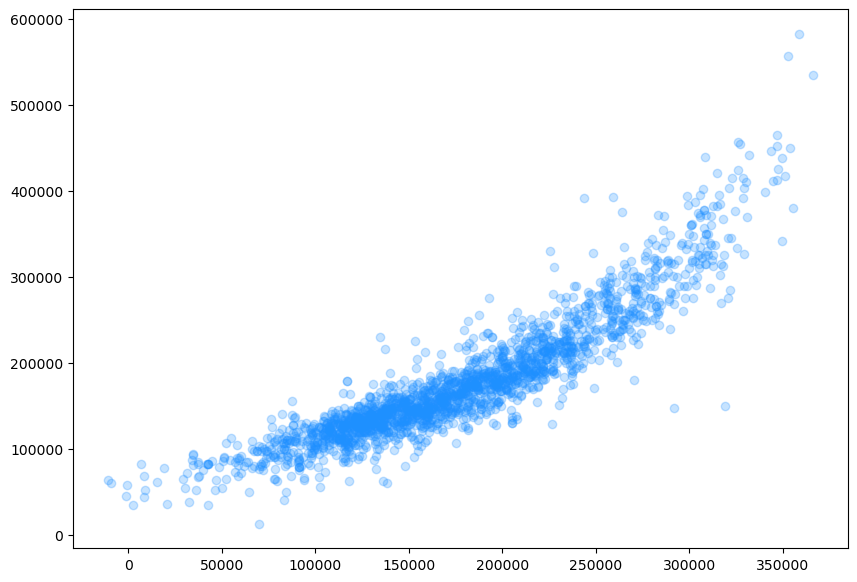

In [136]:
# Has equal variance of errors
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, y, color = 'dodgerblue', alpha=.25);

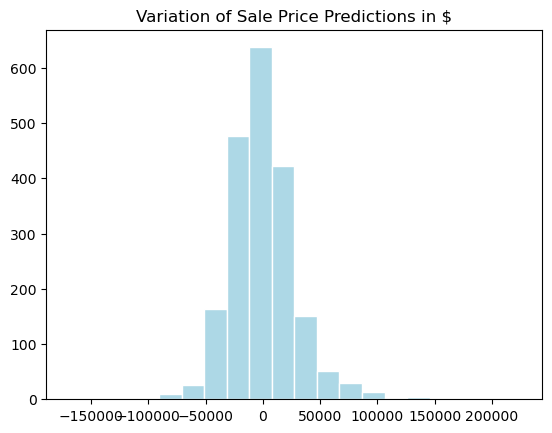

In [137]:
# Residuals are normally Distributed
# this is showing our model is doing well as there are not too many high values far away from the mean. Our margin of error is about $50k or less.
plt.hist(resids, bins=20, color='lightblue', edgecolor = 'white');
plt.title('Variation of Sale Price Predictions in $');

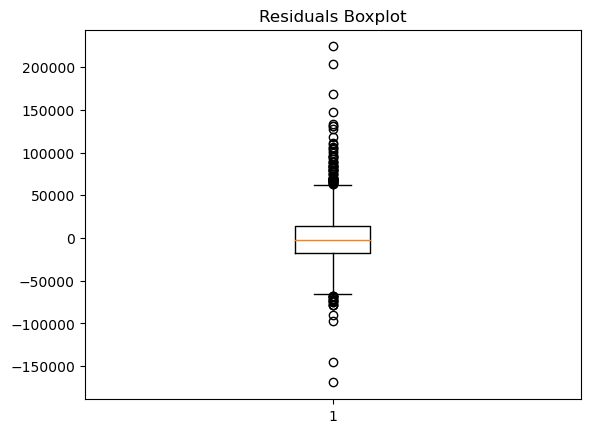

In [138]:
plt.boxplot(resids)
plt.title('Residuals Boxplot')
plt.show()

In [ ]:
# Renamed columns for visualizations
renamed_columns = {
    'Misc Val': 'Misc Value',
    'Yr Sold': 'Year Sold',
    'Low Qual Fin SF': 'Finished Sq Ft',
    'Bsmt Half Bath': 'Basement Half Bathrooms',
    'MS SubClass': 'Bldg Class',
    'Kitchen AbvGr': 'Kitchens',
    'Gr Liv Area': 'Living Area',
    'Total Bsmt SF': 'Basement Sq Ft',
    '1st Flr SF': '1st Floor Sq Ft',
    'Year Remod/Add': 'Year Remodeled',
    'Garage Yr Blt': 'Garage Year',
    'Mas Vnr Area': 'Masonry Veneer Area',
    'TotRms AbvGrd': 'Rooms',
    'Open Porch SF': 'Open Porch Sq Ft',
    'Wood Deck SF': 'Wood Deck Sq Ft',
    'SalePrice': 'Sale Price',
    # Add more mappings as needed
}

# Rename multiple column headers
train_renamed_cols = train.rename(columns=renamed_columns)


In [140]:
high_feats = train_renamed_cols.drop(columns=['Misc Value', 'Year Sold', 'Finished Sq Ft', 'Basement Half Bathrooms', 'Bldg Class', 'Kitchens', 'Enclosed Porch', 'Id', 'PID', 'Overall Cond', 'Half Bath', '2nd Flr SF', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Overall Qual', 'BsmtFin SF 1', 'Bsmt Full Bath', 'Lot Frontage'], axis=1)

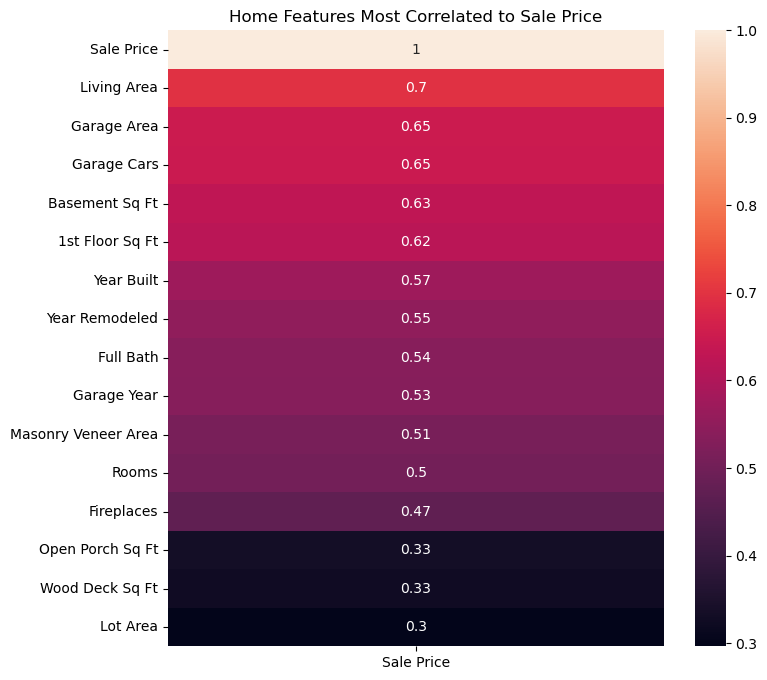

In [141]:
# house features that correlate to Sale Price the most
plt.figure(figsize=(8,8))
sns.heatmap(high_feats.corr(numeric_only=True)[['Sale Price']].sort_values(by='Sale Price', ascending = False), annot=True);
plt.title('Home Features Most Correlated to Sale Price');

In [142]:
low_feats = train_renamed_cols[['Sale Price', 'Year Sold', 'Finished Sq Ft', 'Basement Half Bathrooms', 'Bldg Class', 'Kitchens', 'Enclosed Porch', 'Overall Cond']]

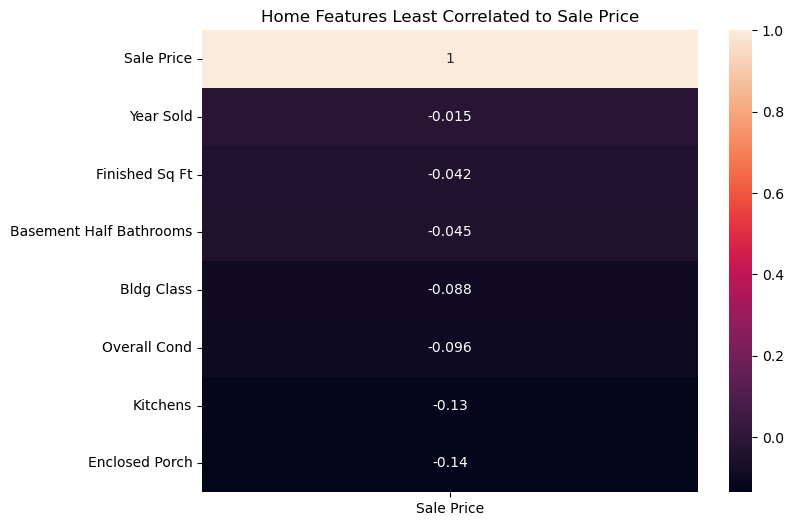

In [143]:
# house features that correlate to Sale Price the least
plt.figure(figsize=(8,6))
sns.heatmap(low_feats.corr(numeric_only=True)[['Sale Price']].sort_values(by='Sale Price', ascending = False), annot=True);
plt.title('Home Features Least Correlated to Sale Price');

## Predictions are normally Distributed. Showing bulk of housing price predictions around $120k-$160k
plt.hist(y_pred, bins=25, color='royalblue', edgecolor = 'white');
plt.title('Distribution of Sale Price Predictions');

In [1520]:
train['saleprice'].mean()

181484.25244140625

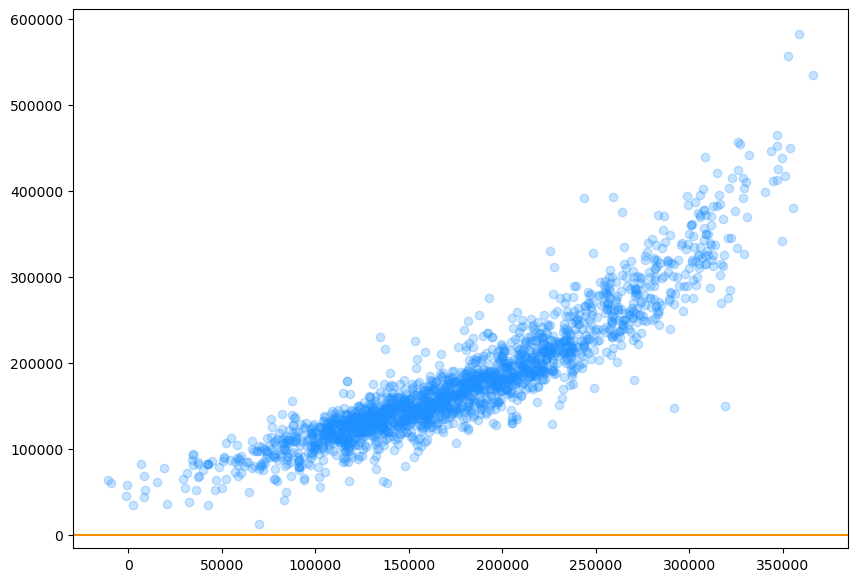

In [145]:
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, y, color = 'dodgerblue', alpha=.25)
plt.axhline(0, color = 'darkorange');

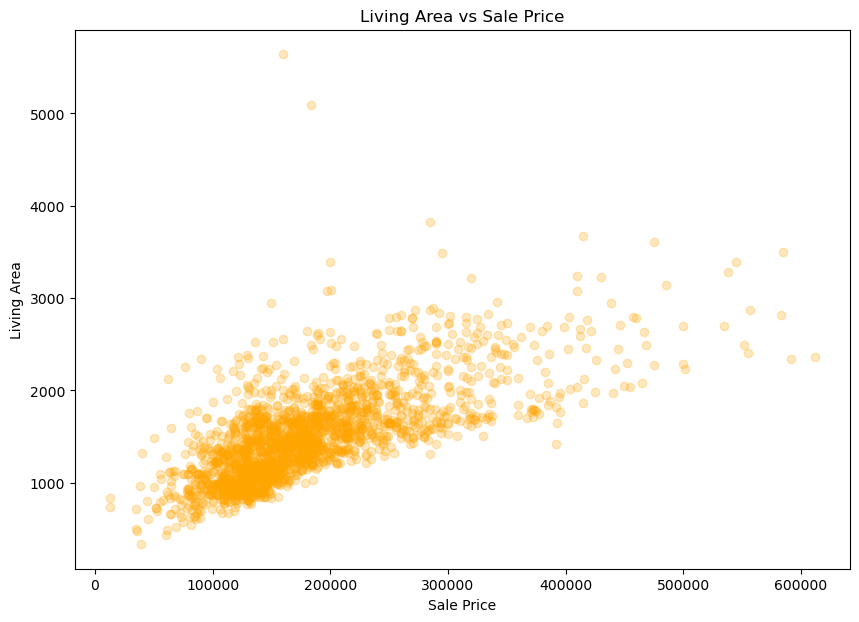

In [146]:
# Obvious steady correlation between Greater Living Area and Sale Price
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Living Area'], color = 'orange', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Living Area')
plt.title('Living Area vs Sale Price');

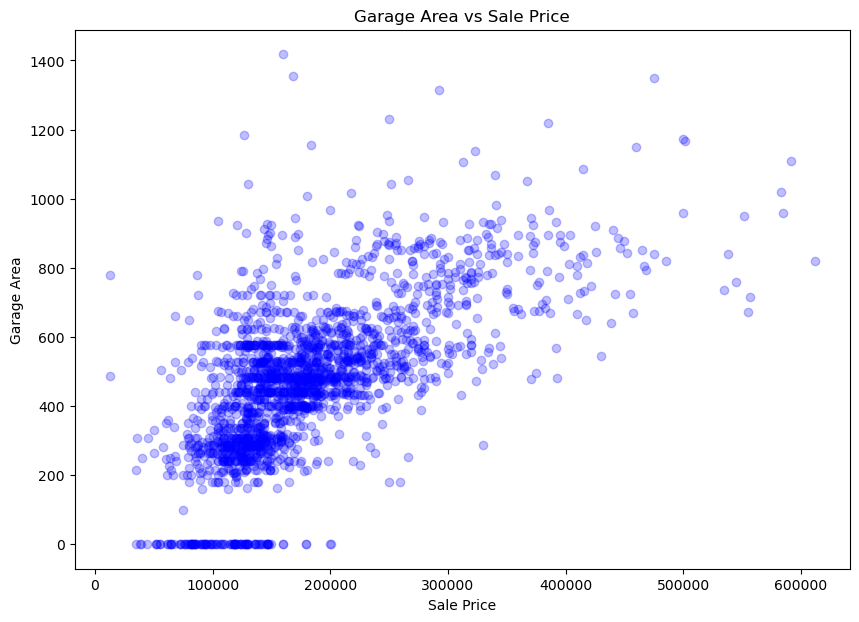

In [147]:
# Steady Here we see many0 homes without garages in the 50k-120k range. Bulk is between 100k-250k
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Garage Area'], color = 'blue', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Garage Area')
plt.title('Garage Area vs Sale Price');

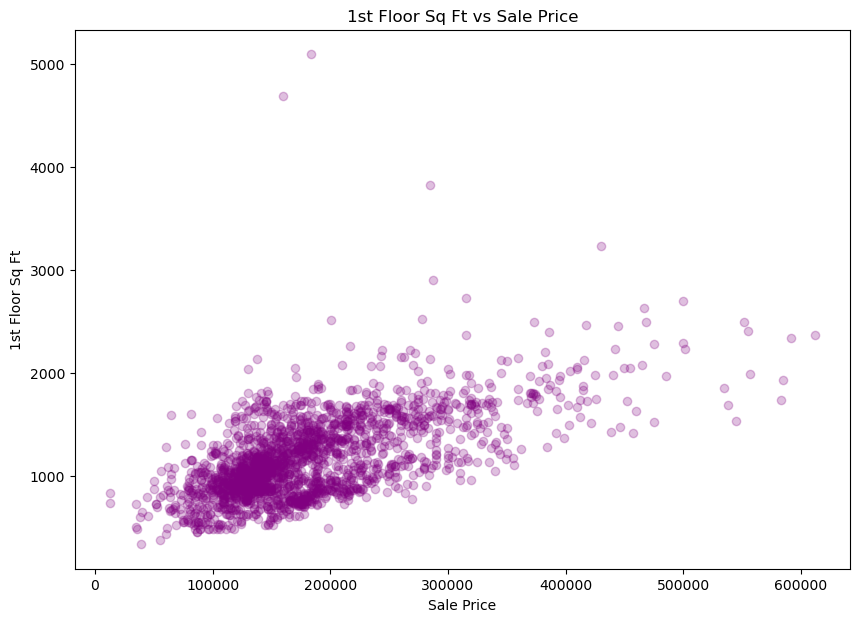

In [148]:
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['1st Floor Sq Ft'], color = 'purple', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('1st Floor Sq Ft')
plt.title('1st Floor Sq Ft vs Sale Price');

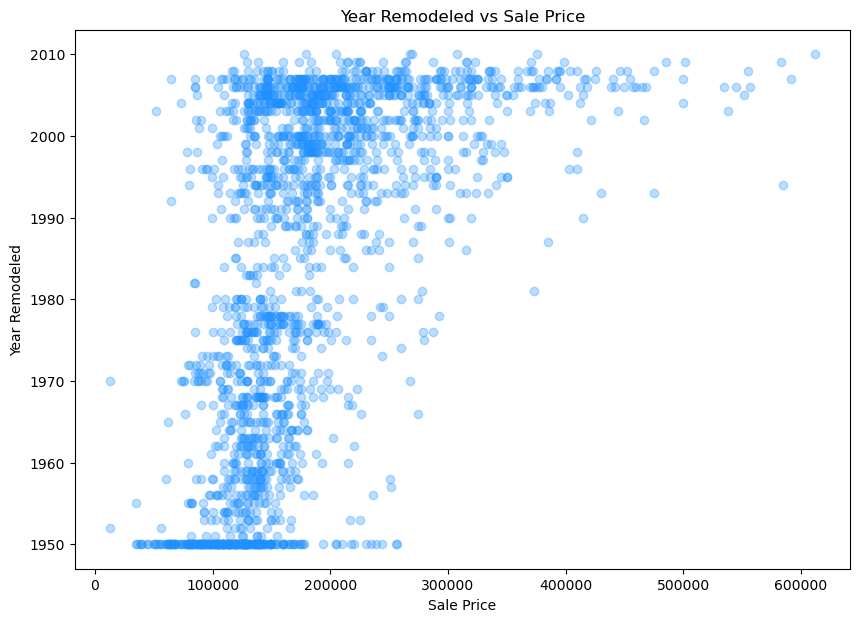

In [149]:

plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Year Remodeled'], color = 'dodgerblue', alpha=.3)
plt.xlabel('Sale Price')
plt.ylabel('Year Remodeled')
plt.title('Year Remodeled vs Sale Price');

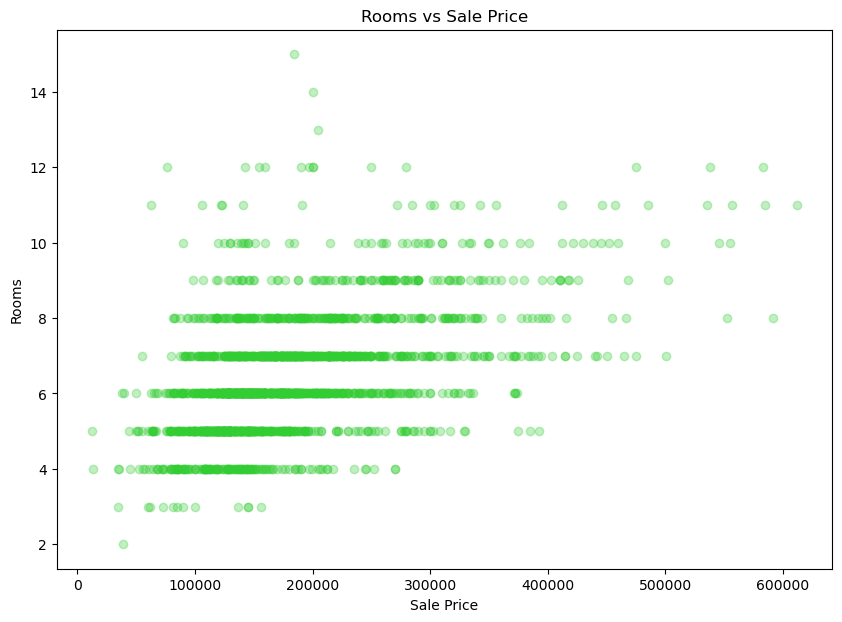

In [150]:
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Rooms'], color = 'limegreen', alpha=.3)
plt.xlabel('Sale Price')
plt.ylabel('Rooms')
plt.title('Rooms vs Sale Price');

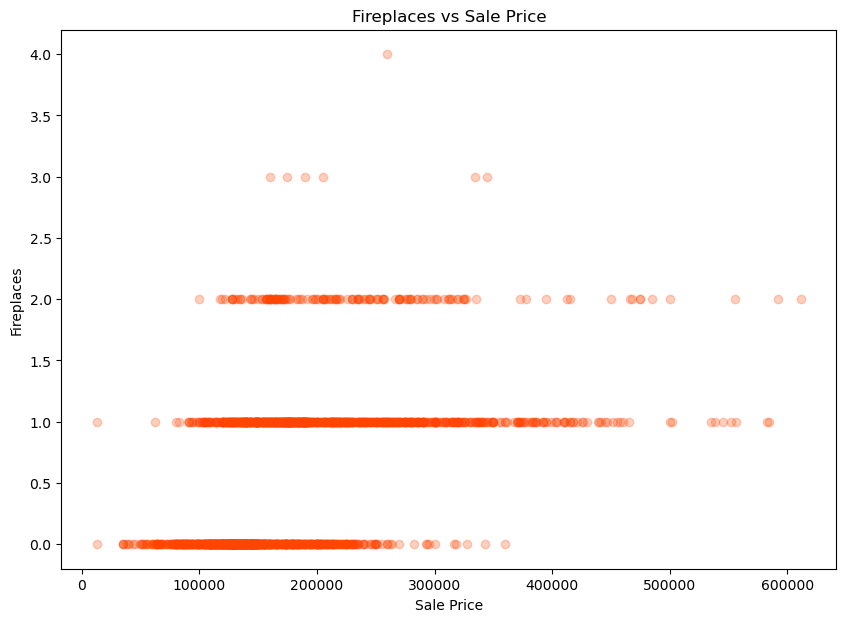

In [151]:
# Houses with just 1 fireplace had a much wider price range than houses with no fireplace
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Fireplaces'], color = 'orangered', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Fireplaces')
plt.title('Fireplaces vs Sale Price');